***(1) Import the datasets and libraries, check shape and datatype***

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [22]:
dataset = pd.read_csv('/content/train.csv')
print(dataset)
ds=pd.DataFrame()

           vidid  adview    views likes  ... comment   published duration category
0      VID_18655      40  1031602  8523  ...    1095   9/14/2016  PT7M37S        F
1      VID_14135       2     1707    56  ...       6   10/1/2016  PT9M30S        D
2       VID_2187       1     2023    25  ...       2    7/2/2016  PT2M16S        C
3      VID_23096       6   620860   777  ...     153   7/27/2016  PT4M22S        H
4      VID_10175       1      666     1  ...       0   6/29/2016    PT31S        D
...          ...     ...      ...   ...  ...     ...         ...      ...      ...
14994     VID_31       2   525949  1137  ...      86   5/18/2015  PT6M10S        A
14995   VID_5861       1   665673  3849  ...     569  10/20/2015  PT3M56S        D
14996    VID_805       4     3479    16  ...       1   8/23/2013  PT3M13S        B
14997  VID_19843       1      963     0  ...       0   10/2/2010    PT26S        G
14998   VID_8534       1    15212    22  ...       4   2/19/2016   PT1M1S        D

[14

In [ ]:
print(dataset.head(10))
print(dataset.tail(10))

       vidid  adview    views likes  ... comment  published  duration category
0  VID_18655      40  1031602  8523  ...    1095  9/14/2016   PT7M37S        F
1  VID_14135       2     1707    56  ...       6  10/1/2016   PT9M30S        D
2   VID_2187       1     2023    25  ...       2   7/2/2016   PT2M16S        C
3  VID_23096       6   620860   777  ...     153  7/27/2016   PT4M22S        H
4  VID_10175       1      666     1  ...       0  6/29/2016     PT31S        D
5  VID_10756       4       78     0  ...       0   5/9/2016     PT15S        D
6   VID_9782   40621    43118    15  ...       0  8/21/2015   PT3M20S        D
7  VID_16452       1    14205    55  ...       1   8/1/2016     PT58S        E
8  VID_18486       1   526015  3064  ...    2582  11/6/2015  PT27M50S        F
9    VID_681       1   406992  3831  ...    7839  10/3/2016  PT11M19S        B

[10 rows x 9 columns]
           vidid  adview    views  likes  ... comment   published  duration category
14989  VID_20638      2

In [23]:
dataset.shape

(14999, 9)

In [ ]:
dataset.describe

<bound method NDFrame.describe of            vidid  adview    views likes  ... comment   published duration category
0      VID_18655      40  1031602  8523  ...    1095   9/14/2016  PT7M37S        F
1      VID_14135       2     1707    56  ...       6   10/1/2016  PT9M30S        D
2       VID_2187       1     2023    25  ...       2    7/2/2016  PT2M16S        C
3      VID_23096       6   620860   777  ...     153   7/27/2016  PT4M22S        H
4      VID_10175       1      666     1  ...       0   6/29/2016    PT31S        D
...          ...     ...      ...   ...  ...     ...         ...      ...      ...
14994     VID_31       2   525949  1137  ...      86   5/18/2015  PT6M10S        A
14995   VID_5861       1   665673  3849  ...     569  10/20/2015  PT3M56S        D
14996    VID_805       4     3479    16  ...       1   8/23/2013  PT3M13S        B
14997  VID_19843       1      963     0  ...       0   10/2/2010    PT26S        G
14998   VID_8534       1    15212    22  ...       4 

In [4]:
k=pd.DataFrame(dataset)
k.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [5]:
dataset.isnull().any()

vidid        False
adview       False
views        False
likes        False
dislikes     False
comment      False
published    False
duration     False
category     False
dtype: bool

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


***(2) Visualise the dataset using plots***

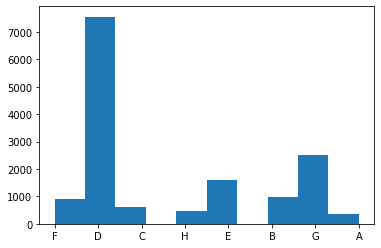

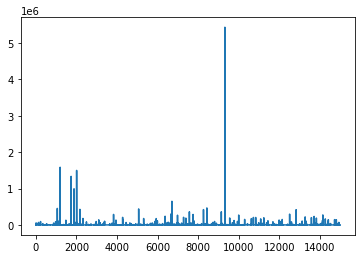

In [ ]:
plt.hist(dataset["category"])
plt.show()
plt.plot(dataset["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
dataset = dataset[dataset["adview"] <2000000]

In [7]:
dataset

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,9/14/2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,10/1/2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,7/2/2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,7/27/2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,6/29/2016,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,5/18/2015,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,10/20/2015,PT3M56S,D
14996,VID_805,4,3479,16,1,1,8/23/2013,PT3M13S,B
14997,VID_19843,1,963,0,0,0,10/2/2010,PT26S,G


***(4) Transform attributes into numerical values and other
necessary transformations***

*Time Conversion*

In [24]:
def timeconv(ch):
   ch=ch[2:]
   c=0
   ri=0
   for i in ch:
     if (i.isnumeric()):
       c=c*10+int(i)
     else:
       if(i=="H"):
         ri=ri+c*3600
         c=0
       elif(i=="M"):
         ri=ri+c*60
         c=0
       else:
         ri=ri+c
   return ri
ds["duration"]=dataset["duration"].apply(lambda x:timeconv(x))
ds

,duration
0,457
1,570
2,136
3,262
4,31
...,...
14994,370
14995,236
14996,193
14997,26


*Category conversion using label encoder*

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds["category"]=le.fit_transform(dataset["category"])
print(ds)

       duration  category
0           457         5
1           570         3
2           136         2
3           262         7
4            31         3
...         ...       ...
14994       370         0
14995       236         3
14996       193         1
14997        26         6
14998        61         3

[14999 rows x 2 columns]


*Transform attributes to numerical values*

In [26]:
ds["views"] = pd.to_numeric(dataset["views"],errors='coerce')
ds["likes"] = pd.to_numeric(dataset["likes"],errors='coerce')
ds["dislikes"] = pd.to_numeric(dataset["dislikes"],errors='coerce')
ds["comment"] = pd.to_numeric(dataset["comment"],errors='coerce')
ds

,duration,category,views,likes,dislikes,comment
0,457,5,1031602.0,8523.0,363.0,1095.0
1,570,3,1707.0,56.0,2.0,6.0
2,136,2,2023.0,25.0,0.0,2.0
3,262,7,620860.0,777.0,161.0,153.0
4,31,3,666.0,1.0,0.0,0.0
...,...,...,...,...,...,...
14994,370,0,525949.0,1137.0,83.0,86.0
14995,236,3,665673.0,3849.0,156.0,569.0
14996,193,1,3479.0,16.0,1.0,1.0
14997,26,6,963.0,0.0,0.0,0.0


In [27]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
ds["category"]=la.fit_transform(dataset["category"])
ds

,duration,category,views,likes,dislikes,comment
0,457,5,1031602.0,8523.0,363.0,1095.0
1,570,3,1707.0,56.0,2.0,6.0
2,136,2,2023.0,25.0,0.0,2.0
3,262,7,620860.0,777.0,161.0,153.0
4,31,3,666.0,1.0,0.0,0.0
...,...,...,...,...,...,...
14994,370,0,525949.0,1137.0,83.0,86.0
14995,236,3,665673.0,3849.0,156.0,569.0
14996,193,1,3479.0,16.0,1.0,1.0
14997,26,6,963.0,0.0,0.0,0.0


*Copying the columns of original dataset to another dataset(ds-includes above conversions) so that no changes are made to original dataset*

In [28]:
ds["vidid"]=dataset["vidid"]
ds["published"]=dataset["published"]
ds["adview"]=dataset["adview"]
ds=ds[["vidid","published","views","likes","dislikes","comment","category","duration","adview"]]
ds

,vidid,published,views,likes,dislikes,comment,category,duration,adview
0,VID_18655,9/14/2016,1031602.0,8523.0,363.0,1095.0,5,457,40
1,VID_14135,10/1/2016,1707.0,56.0,2.0,6.0,3,570,2
2,VID_2187,7/2/2016,2023.0,25.0,0.0,2.0,2,136,1
3,VID_23096,7/27/2016,620860.0,777.0,161.0,153.0,7,262,6
4,VID_10175,6/29/2016,666.0,1.0,0.0,0.0,3,31,1
...,...,...,...,...,...,...,...,...,...
14994,VID_31,5/18/2015,525949.0,1137.0,83.0,86.0,0,370,2
14995,VID_5861,10/20/2015,665673.0,3849.0,156.0,569.0,3,236,1
14996,VID_805,8/23/2013,3479.0,16.0,1.0,1.0,1,193,4
14997,VID_19843,10/2/2010,963.0,0.0,0.0,0.0,6,26,1


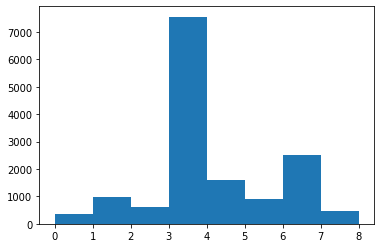

In [29]:
plt.hist(ds["category"],bins=[0,1,2,3,4,5,6,7,8])
plt.show()

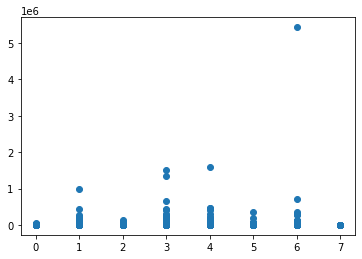

In [30]:
plt.scatter(ds[["category"]],ds[["adview"]])
plt.show()

***(5) Normalise your data and split the data***

*Slicing operation and removing missing values*

In [35]:
ds.iloc[:,-2:8]
ds.iloc[:,2:8].values
ds=ds.dropna()
ds

,vidid,published,views,likes,dislikes,comment,category,duration,adview
0,VID_18655,9/14/2016,1031602.0,8523.0,363.0,1095.0,5,457,40
1,VID_14135,10/1/2016,1707.0,56.0,2.0,6.0,3,570,2
2,VID_2187,7/2/2016,2023.0,25.0,0.0,2.0,2,136,1
3,VID_23096,7/27/2016,620860.0,777.0,161.0,153.0,7,262,6
4,VID_10175,6/29/2016,666.0,1.0,0.0,0.0,3,31,1
...,...,...,...,...,...,...,...,...,...
14994,VID_31,5/18/2015,525949.0,1137.0,83.0,86.0,0,370,2
14995,VID_5861,10/20/2015,665673.0,3849.0,156.0,569.0,3,236,1
14996,VID_805,8/23/2013,3479.0,16.0,1.0,1.0,1,193,4
14997,VID_19843,10/2/2010,963.0,0.0,0.0,0.0,6,26,1


Normalising Data

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ds_train=pd.DataFrame(scaler.fit_transform(ds.iloc[:,2:-1]))
ds_train

,0,1,2,3,4,5
0,0.007472,0.030029,0.007341,0.014591,0.714286,0.010799
1,0.000012,0.000197,0.000040,0.000080,0.428571,0.013470
2,0.000014,0.000088,0.000000,0.000027,0.285714,0.003214
3,0.004497,0.002738,0.003256,0.002039,1.000000,0.006191
4,0.000004,0.000004,0.000000,0.000000,0.428571,0.000733
...,...,...,...,...,...,...
14631,0.003810,0.004006,0.001678,0.001146,0.000000,0.008744
14632,0.004822,0.013561,0.003155,0.007582,0.428571,0.005577
14633,0.000025,0.000056,0.000020,0.000013,0.142857,0.004561
14634,0.000007,0.000000,0.000000,0.000000,0.857143,0.000614


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(ds_train.iloc[:,:-1].values,ds.iloc[:,-1:].values, test_size=0.2, random_state=42)
x_train.shape

(11708, 5)

***(6) Use linear regression, Support Vector Regressor for training and get errors.***

***Testing using different models***

In [60]:
#Finding errors
from sklearn import metrics
mae=[0,0,0,0,0]
mse=[0,0,0,0,0]
rmse=[0,0,0,0,0]
def print_error(x_test, y_test, model_name):
  prediction = model_name.predict(x_test)
  a=metrics.mean_absolute_error(y_test, prediction)
  b=metrics.mean_squared_error(y_test, prediction)
  c=np.sqrt(b)
  print('Mean Absolute Error:', a)
  print('Mean Squared Error:', b)
  print('Root Mean Squared Error:', c)
  return ([a,b,c])

In [61]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train, y_train)
mae[0],mse[0],rmse[0]=print_error(x_test,y_test, linear_regression)

Mean Absolute Error: 3289.1044300340054
Mean Squared Error: 834776519.5864196
Root Mean Squared Error: 28892.499365517335


In [62]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(x_train,y_train.ravel())
mae[1],mse[1],rmse[1]=print_error(x_test,y_test, supportvector_regressor)

Mean Absolute Error: 1696.9638971812276
Mean Squared Error: 833686249.874528
Root Mean Squared Error: 28873.625506238874


***(7) Use Decision Tree Regressor and Random Forest Regressors***

In [63]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
mae[2],mse[2],rmse[2]=print_error(x_test,y_test, decision_tree)

Mean Absolute Error: 3552.4015539617485
Mean Squared Error: 1793699016.2299008
Root Mean Squared Error: 42352.08396560789


In [64]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(x_train,y_train.ravel())
mae[3],mse[3],rmse[3]=print_error(x_test,y_test, random_forest)

Mean Absolute Error: 3225.9794486945475
Mean Squared Error: 872734352.9240614
Root Mean Squared Error: 29542.077667693946


*Heat map*

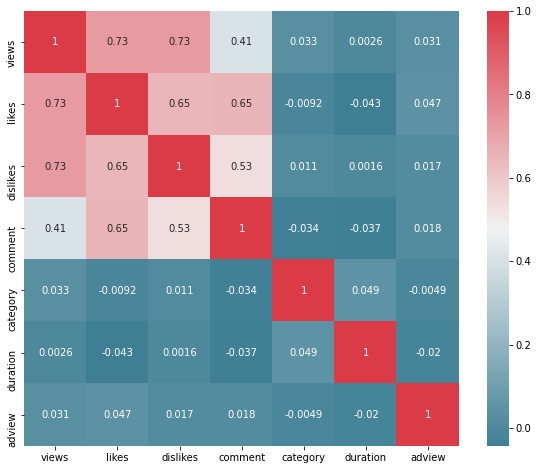

In [36]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = ds.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

***(8) Build an artificial neural network and train it with different layers
and hyperparameters. Use keras.***

In [65]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=x_train.shape[1:]),
                                Dense(6,activation="relu"), 
                                Dense(1)
                                ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(x_train,y_train,epochs=100)
ann.summary()
mae[4],mse[4],rmse[4]=print_error(x_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 1ms/step - loss: 767405760.0000 - mean_squared_error: 767405760.0000
Epoch 2/100
366/366 [==============================] - 0s 972us/step - loss: 767400704.0000 - mean_squared_error: 767400704.0000
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 767389184.0000 - mean_squared_error: 767389184.0000
Epoch 4/100
366/366 [==============================] - 0s 991us/step - loss: 767368128.0000 - mean_squared_error: 767368128.0000
Epoch 5/100
366/366 [==============================] - 0s 951us/step - loss: 767335680.0000 - mean_squared_error: 767335680.0000
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 767291840.0000 - mean_squared_error: 767291840.0000
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 767236544.0000 - mean_squared_error: 767236544.0000
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 767170752.0000 - mean_squared_

***(9) Pick the best model based on error as well as
generalisation.***

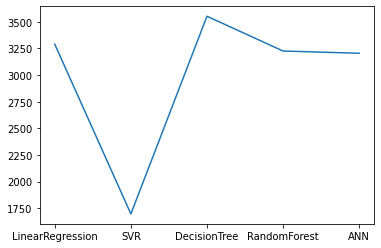

In [74]:
plt.plot(["LinearRegression","SVR","DecisionTree","RandomForest","ANN"],mae)
plt.show()

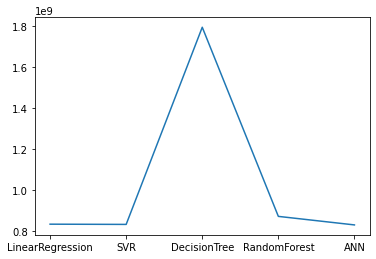

In [75]:
plt.plot(["LinearRegression","SVR","DecisionTree","RandomForest","ANN"],mse)
plt.show()

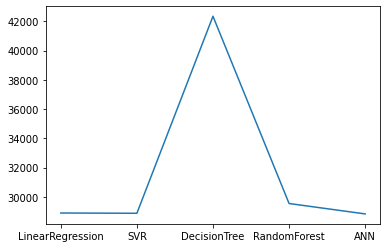

In [76]:
plt.plot(["LinearRegression","SVR","DecisionTree","RandomForest","ANN"],rmse)
plt.show()

***(10) Save your model and predict on the test set***

In [47]:
#Saving Scikitlearn models
import joblib
joblib.dump(supportvector_regressor, "supportvector_regressor_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [48]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [49]:
t=pd.read_csv('test.csv')
print(t)
ts=pd.DataFrame()

          vidid    views likes  ...   published    duration category
0      VID_1054   440238  6153  ...  2017-02-18     PT7M29S        B
1     VID_18629  1040132  8171  ...  2016-06-28     PT6M29S        F
2     VID_13967    28534    31  ...  2014-03-10    PT37M54S        D
3     VID_19442  1316715  2284  ...  2010-06-05     PT9M55S        G
4       VID_770  1893173  2519  ...  2016-09-03      PT3M8S        B
...         ...      ...   ...  ...         ...         ...      ...
8759   VID_2944   111205   471  ...  2011-04-19     PT3M14S        C
8760   VID_8195  1074457  1024  ...  2016-06-03  PT2H18M35S        D
8761  VID_18973  1891692  4606  ...  2016-06-26     PT7M14S        F
8762   VID_5849   714859  1639  ...  2016-03-23     PT3M15S        D
8763   VID_8494     5297    12  ...  2016-12-19    PT10M14S        D

[8764 rows x 8 columns]


In [50]:
print(t.shape)
t.head(10)

(8764, 8)


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
5,VID_10315,145820,215,29,19,2014-01-23,PT39M18S,D
6,VID_7417,12921,169,3,73,2014-05-01,PT10M4S,D
7,VID_17788,4502,65,2,8,2016-07-13,PT2M35S,F
8,VID_14591,662956,1841,321,219,2014-01-13,PT13M57S,D
9,VID_1228,552009,6732,97,1100,2016-08-25,PT17M49S,B


In [51]:
def timeconv(ch):
   ch=ch[2:]
   c=0
   ri=0
   for i in ch:
     if (i.isnumeric()):
       c=c*10+int(i)
     else:
       if(i=="H"):
         ri=ri+c*3600
         c=0
       elif(i=="M"):
         ri=ri+c*60
         c=0
       else:
         ri=ri+c
   return ri
s=t["duration"]
ts["duration"]=s.apply(lambda x:timeconv(x))
ts

,duration
0,449
1,389
2,2274
3,595
4,188
...,...
8759,194
8760,8315
8761,434
8762,195


In [52]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
ts["category"]=la.fit_transform(t["category"])
ts.head(10)

,duration,category
0,449,1
1,389,5
2,2274,3
3,595,6
4,188,1
5,2358,3
6,604,3
7,155,5
8,837,3
9,1069,1


In [53]:
ts["views"] = pd.to_numeric(t["views"],errors='coerce')
ts["likes"] = pd.to_numeric(t["likes"],errors='coerce')
ts["dislikes"] = pd.to_numeric(t["dislikes"],errors='coerce')
ts["comment"] = pd.to_numeric(t["comment"],errors='coerce')
ts

,duration,category,views,likes,dislikes,comment
0,449,1,440238.0,6153.0,218.0,1377.0
1,389,5,1040132.0,8171.0,340.0,1047.0
2,2274,3,28534.0,31.0,11.0,1.0
3,595,6,1316715.0,2284.0,250.0,274.0
4,188,1,1893173.0,2519.0,225.0,116.0
...,...,...,...,...,...,...
8759,194,2,111205.0,471.0,14.0,101.0
8760,8315,3,1074457.0,1024.0,195.0,65.0
8761,434,5,1891692.0,4606.0,1109.0,191.0
8762,195,3,714859.0,1639.0,151.0,382.0


In [54]:
ts["vidid"]=t["vidid"]
ts["published"]=t["published"]
ts=ts[["vidid","published","views","likes","dislikes","comment","category","duration"]]
ts

,vidid,published,views,likes,dislikes,comment,category,duration
0,VID_1054,2017-02-18,440238.0,6153.0,218.0,1377.0,1,449
1,VID_18629,2016-06-28,1040132.0,8171.0,340.0,1047.0,5,389
2,VID_13967,2014-03-10,28534.0,31.0,11.0,1.0,3,2274
3,VID_19442,2010-06-05,1316715.0,2284.0,250.0,274.0,6,595
4,VID_770,2016-09-03,1893173.0,2519.0,225.0,116.0,1,188
...,...,...,...,...,...,...,...,...
8759,VID_2944,2011-04-19,111205.0,471.0,14.0,101.0,2,194
8760,VID_8195,2016-06-03,1074457.0,1024.0,195.0,65.0,3,8315
8761,VID_18973,2016-06-26,1891692.0,4606.0,1109.0,191.0,5,434
8762,VID_5849,2016-03-23,714859.0,1639.0,151.0,382.0,3,195


In [55]:
ts=ts.dropna()
ts.head(10)

,vidid,published,views,likes,dislikes,comment,category,duration
0,VID_1054,2017-02-18,440238.0,6153.0,218.0,1377.0,1,449
1,VID_18629,2016-06-28,1040132.0,8171.0,340.0,1047.0,5,389
2,VID_13967,2014-03-10,28534.0,31.0,11.0,1.0,3,2274
3,VID_19442,2010-06-05,1316715.0,2284.0,250.0,274.0,6,595
4,VID_770,2016-09-03,1893173.0,2519.0,225.0,116.0,1,188
5,VID_10315,2014-01-23,145820.0,215.0,29.0,19.0,3,2358
6,VID_7417,2014-05-01,12921.0,169.0,3.0,73.0,3,604
7,VID_17788,2016-07-13,4502.0,65.0,2.0,8.0,5,155
8,VID_14591,2014-01-13,662956.0,1841.0,321.0,219.0,3,837
9,VID_1228,2016-08-25,552009.0,6732.0,97.0,1100.0,1,1069


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ts_test=pd.DataFrame(scaler.fit_transform(ts.iloc[:,2:-1]))
ts_test

,0,1,2,3,4
0,0.001955,0.019224,0.006052,0.016152,0.142857
1,0.004620,0.025529,0.009438,0.012282,0.714286
2,0.000127,0.000097,0.000305,0.000012,0.428571
3,0.005848,0.007136,0.006940,0.003214,0.857143
4,0.008408,0.007870,0.006246,0.001361,0.142857
...,...,...,...,...,...
8544,0.000494,0.001472,0.000389,0.001185,0.285714
8545,0.004772,0.003199,0.005413,0.000762,0.428571
8546,0.008402,0.014391,0.030786,0.002240,0.714286
8547,0.003175,0.005121,0.004192,0.004481,0.428571


In [59]:
model=joblib.load('/content/supportvector_regressor_youtubeadview.pkl')
data=model.predict(ts_test)
from numpy import savetxt
savetxt('Predictions_Submission.csv', data, delimiter=',')